# Assignment 4 - Unsupervised Learning and Neural Networks

## Varun Prasad
Netid: vp60

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

## 1

### [35 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. 

In [ ]:
def kmeans(X, k, max_steps=, convergence_threshold=):
    '''kmeans
    
        Input:
            X: matrix of input data where each row represents a sample
            k: number of means to use
            max_steps: maximum number of iterations to run the algorithm
            convergence_threshold: if the means change less than this
                                   value in an iteration, declare convergence
        Output:
            means: a matrix listing the k means
            cluster_assignment: a list of the cluster assignments for each samples
            dissimilarity: sum of squared error of the Euclidean distance from each point to the cluster mean
    '''

**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own*

**ANSWER**

**(a)** The kmeans algorithim is shown below. 

In [90]:
# Import numpy
import numpy as np

# KMeans Algorithm
class kmeans:
    '''kmeans
    
        Input:
            X: matrix of input data where each row represents a sample
            k: number of means to use
            max_steps: maximum number of iterations to run the algorithm
            convergence_threshold: if the means change less than this
                                   value in an iteration, declare convergence
        Output:
            means: a matrix listing the k means
            cluster_assignment: a list of the cluster assignments for each sample
            dissimilarity: sum of squared error of the Euclidean distance from each point to the cluster mean
    '''
    # Initialization
    def __init__(self, X, k, max_steps = 250, convergence_threshold = 0.0001):
        self.X = X
        self.k = k
        self.steps = max_steps
        self.threshold = convergence_threshold
    
    # Initialize k clusters using random values
    def initialize_centroids(self):
        # Create k centroids randomly
        centroids = self.X[np.random.choice(self.X.shape[0],self.k)]
        
        # Assign labels to each centroid (starting from 1)
        labels = np.arange(0,centroids.shape[0])
        
        # Concatenate centroids with labels
        centroids = np.concatenate((centroids,labels.reshape(-1,1)), axis = 1)
        
        # Return centroids
        return centroids
    
    # Calculate distance between each class and the centroid
    def distance(self, centroids):
        # Initialize distance matrix
        dist = np.zeros((self.X.shape[0], self.k+1))
        
        # Calculate distance to each centroid and label nearest one
        for i in range(self.X.shape[0]):
            # Calculate distance
            d = np.sqrt(np.sum((self.X[i] - centroids[:,:-1])**2, axis = 1))
            # Find label of nearest centroid
            dist_ind = np.array(np.argmin(d))
            # Fill in distance matrix with distances and labels
            dist[i] = np.concatenate((d.reshape(1,-1), dist_ind.reshape(-1,1)), axis = 1)
        
        # Return distance
        return dist

    # Update centroids and fit; stop when max steps or convergence is reached
    def fit(self):
        # Initialize centroids
        init_cent = self.initialize_centroids()
        
        # Initialize matrix of centroids
        new_cent = np.zeros((init_cent.shape[0], init_cent.shape[1]))
        
        # Initialize difference in means by distance using max 
        mean_diff = np.max(np.sqrt(np.sum((new_cent - init_cent)**2, axis = 1)))
        
        # Initialize sse matrix
        sse = np.zeros((init_cent.shape[0], 1))
                  
        # Initialize steps
        step = 0
        
        # Iterate based on steps or matching labels 
        while (mean_diff > self.threshold):
            # Initialize distances and labels
            dist = self.distance(init_cent)
                
            # Find number of unique clusters
            clust_count = np.unique(dist[:,self.k])
            
            for i in range(len(clust_count)):
                # Find indices of each cluster label
                clust_ind = np.where(dist[:,self.k] == clust_count[i])
                
                # Match cluster label indices to original data and calculate mean
                new_cent[i,:-1] = self.X[clust_ind].mean(axis = 0)
                
                # Label updated centroid with cluster label
                new_cent[i,-1] = clust_count[i]
                
                # Update sse values
                sse[i] = np.sum((new_cent[i,:-1]-self.X[clust_ind])**2)
                pass
            
            # Calculate mean difference and update centroids
            mean_diff = np.max(np.sqrt(np.sum((new_cent - init_cent)**2, axis = 1)))
            init_cent = new_cent
            step+=1
    
            # Break if max number of iterations is reached
            if (step > self.steps):
                break
                  
        # Create final values for output (centroids, labels, dissimilarity)
        means = init_cent
        dissimilarity = np.sum(sse)
        cluster_assignments = self.distance(means)[:,-1]
                     
        # Return final values
        return means, dissimilarity, cluster_assignments

**(b)** Using the blobs module in scikit-learn, we can create two different datasets and test the KMeans classifier.

In [91]:
# Import blobs
from sklearn.datasets import make_blobs

# Create datasets
blobs1 = make_blobs(n_samples = 5000, centers = 2, random_state = 0)
blobs2 = make_blobs(n_samples = 5000, centers = 5, random_state = 0)

# Create list of k values
k_list = np.arange(1,11)

# Initialize dissimilarity arrays
dis_blob1 = np.zeros(10)
dis_blob2 = np.zeros(10)

# Initialize kmeans lists
means_blob1 = [None]*10
means_blob2 = [None]*10

# Initialize cluster assignments lists
clusts_blob1 = [None]*10
clusts_blob2 = [None]*10

In [115]:
# Set random seed for consistent results
#np.random.seed(100)

# Run algorithm 
for i in range(len(k_list)):
    # First dataset 
    km1 = kmeans(blobs1[0], k = k_list[i])
    means, dis, clust = km1.fit()
    means_blob1[i] = means[:,:-1]
    dis_blob1[i] = dis
    clusts_blob1[i] = clust
    
    # Second datatset
    km2 = kmeans(blobs2[0], k = k_list[i])
    means_2, dis_2, clust_2 = km2.fit()
    means_blob2[i] = means_2[:,:-1]
    dis_blob2[i] = dis_2
    clusts_blob2[i] = clust_2

For each dataset, the original data, the elbow curves of dissimilarity vs k, and the clustered data are shown in the plots below. 

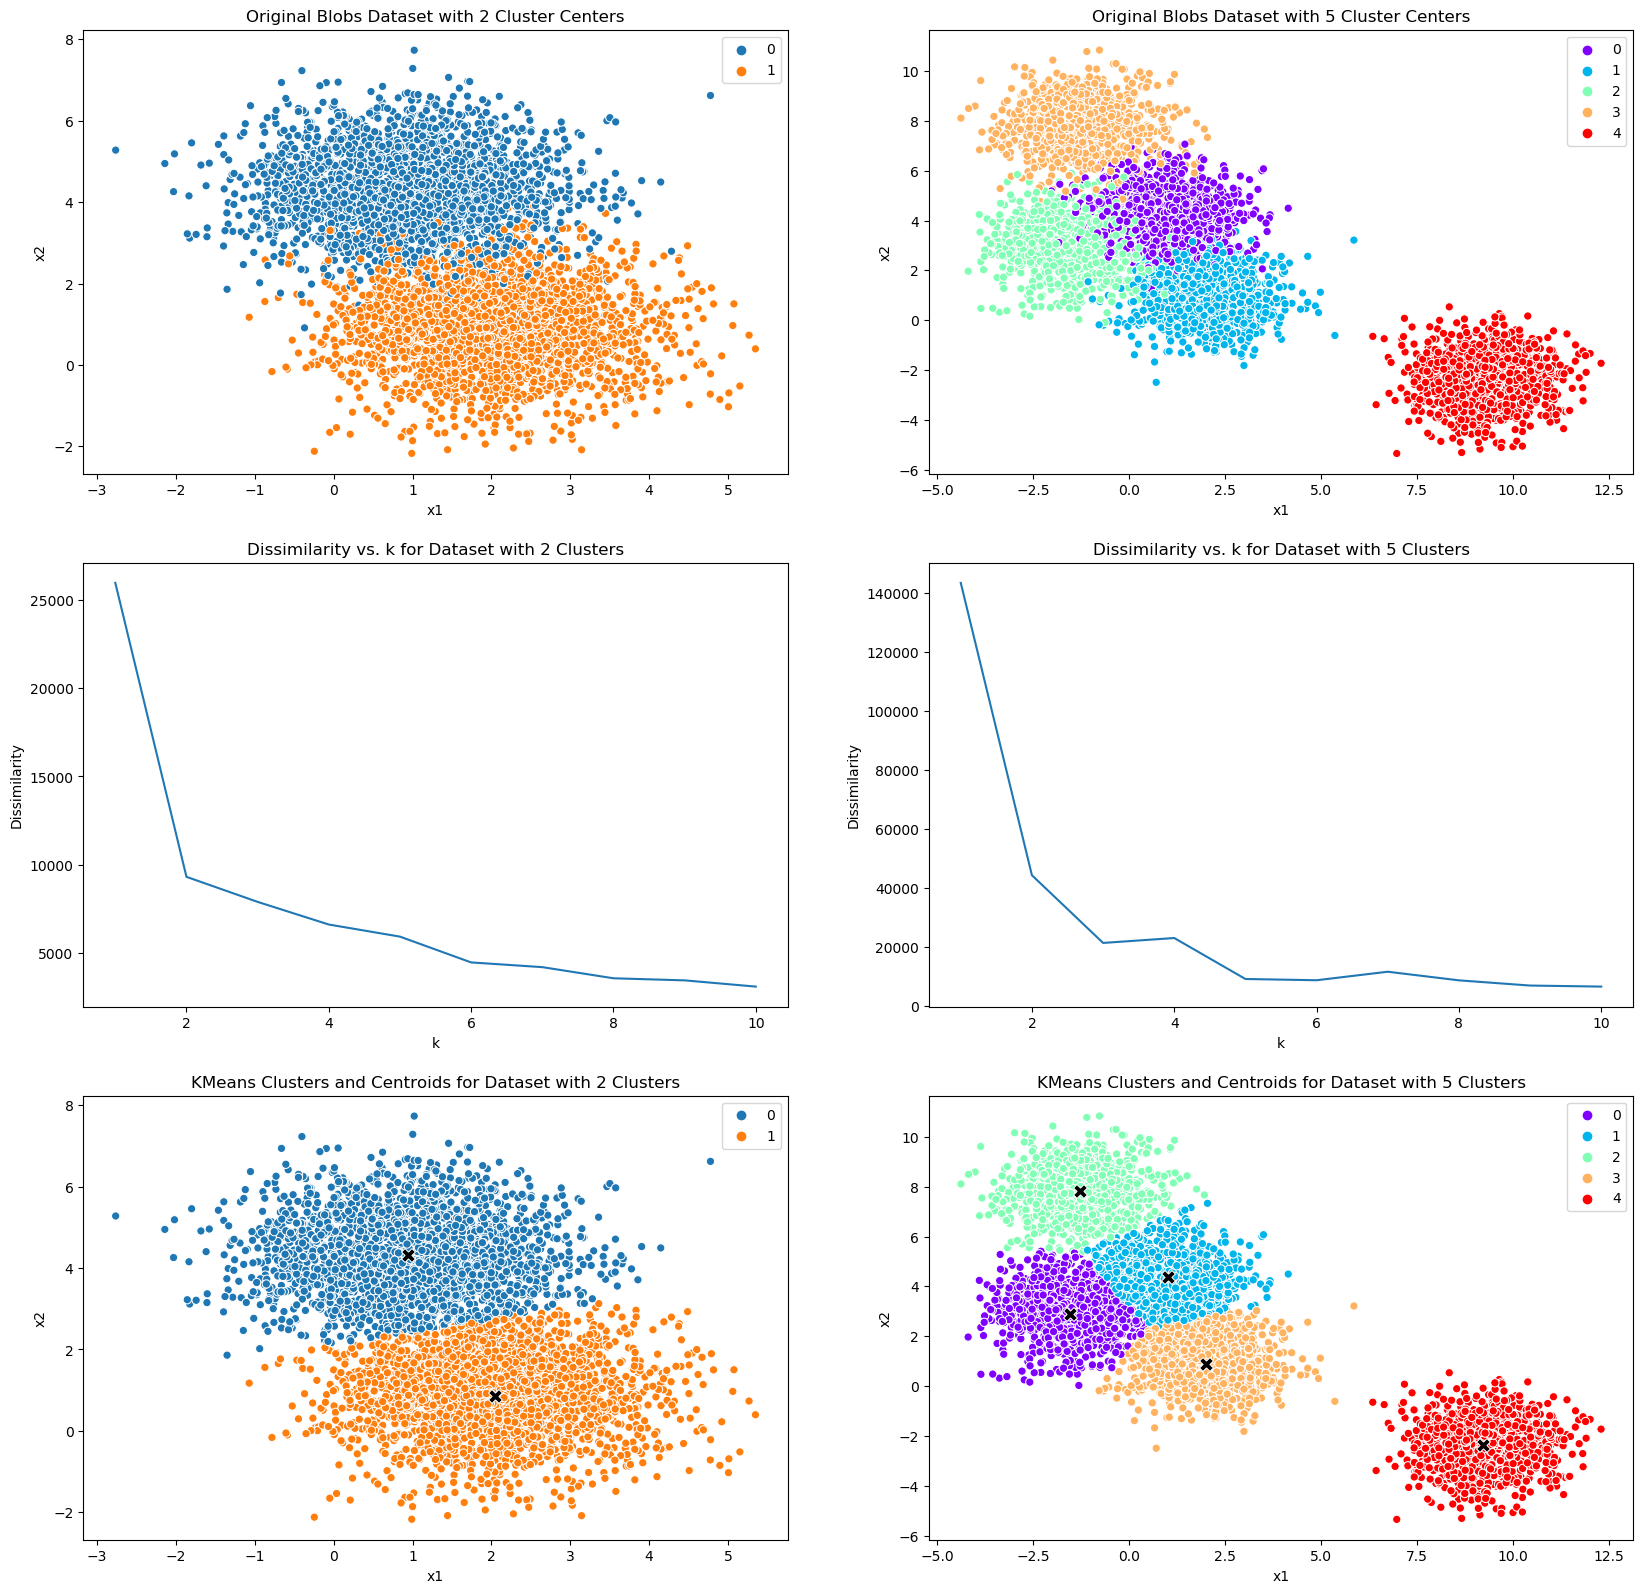

In [116]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot results for Dataset 1 (2 centers)
plt.figure(figsize = (20,20), dpi = 100)
plt.subplot(3,2,1)
sns.scatterplot(blobs1[0][:,0], blobs1[0][:,1], hue = blobs1[1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original Blobs Dataset with 2 Cluster Centers')

plt.subplot(3,2,3)
sns.lineplot(k_list, dis_blob1)
plt.xlabel('k')
plt.ylabel('Dissimilarity')
plt.title('Dissimilarity vs. k for Dataset with 2 Clusters')

plt.subplot(3,2,5)
sns.scatterplot(blobs1[0][:,0], blobs1[0][:,1], hue = clusts_blob1[1].astype(int))
sns.scatterplot(means_blob1[1][:,0], means_blob1[1][:,1], color = 'black', marker = 'X',
               s = 100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KMeans Clusters and Centroids for Dataset with 2 Clusters')


plt.subplot(3,2,2)
sns.scatterplot(blobs2[0][:,0], blobs2[0][:,1], hue = blobs2[1], palette = 'rainbow',
               legend = 'full')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original Blobs Dataset with 5 Cluster Centers')

plt.subplot(3,2,4)
sns.lineplot(k_list, dis_blob2)
plt.xlabel('k')
plt.ylabel('Dissimilarity')
plt.title('Dissimilarity vs. k for Dataset with 5 Clusters')

plt.subplot(3,2,6)
sns.scatterplot(blobs2[0][:,0], blobs2[0][:,1], hue = clusts_blob2[4].astype(int), palette = 'rainbow',
               legend = 'full')
sns.scatterplot(means_blob2[4][:,0], means_blob2[4][:,1], color = 'black', marker = 'X',
               s = 100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KMeans Clusters and Centroids for Dataset with 5 Clusters')
plt.show()

Based on the plots above, a k of 2 is optimal for the first dataset and a k of 5 is optimal for the second dataset. The elbow plot for the first dataset shows a rapid increase in dissimilarity from k = 1 to k = 2, while slowly decreasing at higher k values. The elbow plot for the 2nd dataset shows that the dissimilarity does not decrease much after a k of 5. Thus k values of 2 and 5, are optimal for the first and second datasets, respectively. Note that there is a slight jump at a k of 4 in the elbow plot for the second dataset. The plots and clusters do depend on the initial centroids, which vary with each run. 

**(c)** The different methods of clustering are explained as follows: 

1. k-means: In K-Means clustering, a set of K points are randomly initiated as cluster centers, and with each iteration, points are assigned to the closest cluster centroid until cluster centroids do not change. The cluster centroid is then reset as the mean of the newly assigned points. K-Means requires K to be set before running the algorithm, which along with the random initialization of the cluster centroids, can drastically affect the final results, requiring multiple runs to determine the best K and starting points.  
2. Agglomerative: Agglomerative clustering is a form of hierarchical clustering in which each point starts as its own cluster but merges with subsequent clusters based on a computation of proximity using a distance metric and a measure linkage, the latter which can be min (single link), max (complete link), or average. This type of clustering can be represented by a dendrogram, and is particularly useful when creating hierarchies likes taxonomies, but is disadvantageous when presented with noisy, high-dimensional data.   
3. Gaussian Mixture Models: A Gaussian Mixture Model (GMM) is a probabalistic clustering algorithm that fits a series of Gaussian distributions to the data, maximizing the likelihood by creating proper distribution estimates, and assigns each data point to the cluster with the highest probability. GMMs can produce soft clustering and are very powerful in handling in-cluster variance, but they struggle when the clusters are not approximately Gaussian. 
4. DBSCAN: DBSCAN clustering is a density-based clustering algorithm that discards all labeled noise points and finds all border points within a specified radius of a core point, the latter which is defined as a point that has the specified minimum number of neighboring points within a desired distance. The algorithm is very robust to outliers, but it cannot handle significant variation in cluster density and border points reachable from more than one cluster could be assigned to any of them. 
5. Spectral: Spectral clustering is a graph-based algorithm that works by creating an affinity matrix of the data and then performing dimensionality reduction to enable more efficient clustering. It is primarily focused on connectedness of data and does not make any assumptions about the data, but is can be computationally expensive for larger datasets and requires specifying the number of clusters. 

**(d)** Each of the algorithms described above is run on 4 different datasets: `Aggregation.txt`, `Compound.txt`, `d31.txt`, and `jain.txt`.

In [118]:
# Import data, remove label column, and convert to numpy array
import pandas as pd

aggregation = pd.read_csv("aggregation.txt", sep = "\t", header = None).iloc[:,:-1].values
compound = pd.read_csv("compound.txt", sep = "\t", header = None).iloc[:,:-1].values
d31 = pd.read_csv("d31.txt", sep = "\t", header = None).iloc[:,:-1].values
jain = pd.read_csv("jain.txt", sep = "\t", header = None).iloc[:,:-1].values

The scatterplot of each dataset is shown below. Based on the plots, there appear to be approximately 7, 6, 30, and 2 clusters for the aggregation, compound, d31, and jain datasets, respectively. 

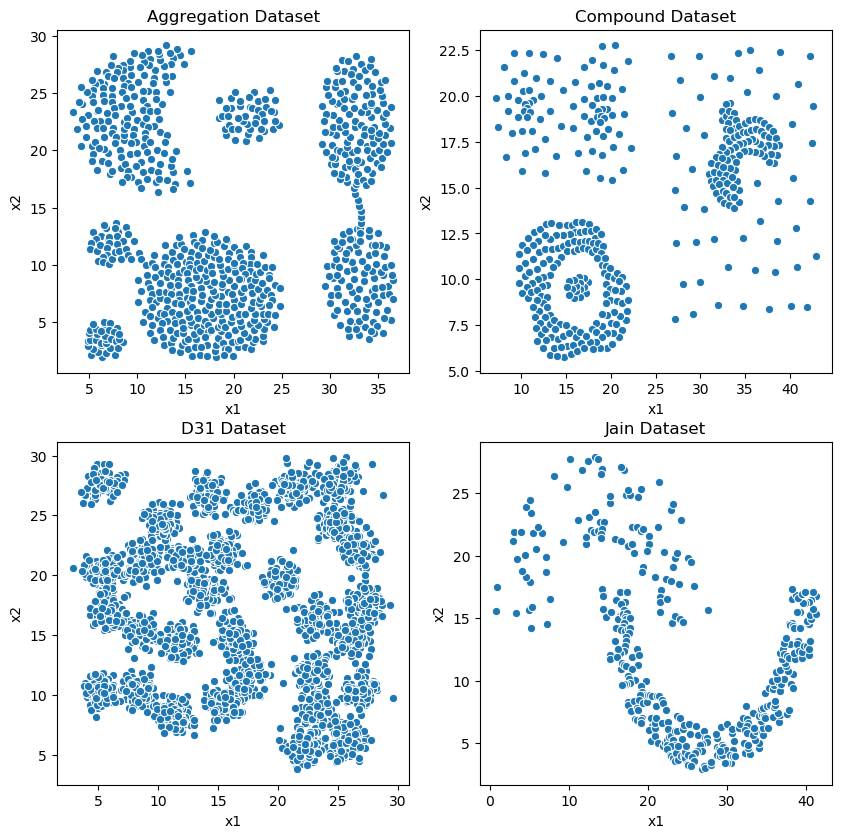

In [119]:
# Plot data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10), dpi = 100)
# Aggregation
plt.subplot(2,2,1)
sns.scatterplot(aggregation[:,0], aggregation[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Aggregation Dataset')

# Compound
plt.subplot(2,2,2)
sns.scatterplot(compound[:,0], compound[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Compound Dataset')

plt.subplot(2,2,3)
sns.scatterplot(d31[:,0], d31[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('D31 Dataset')

plt.subplot(2,2,4)
sns.scatterplot(jain[:,0], jain[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Jain Dataset')
plt.show()

In [120]:
# Import clustering libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

In [121]:
# Kmeans 
# Aggregation data
km_agg = KMeans(n_clusters = 6).fit(aggregation)

# Compound
km_comp = KMeans(n_clusters = 5).fit(compound)

# D31
km_d31 = KMeans(n_clusters = 30).fit(d31)

# Jain
km_jain = KMeans(n_clusters = 2).fit(jain)

In [122]:
# Agglomerative
# Aggregation data
agg_agg = AgglomerativeClustering(n_clusters = 7, linkage = 'average').fit(aggregation)

# Compound
agg_comp = AgglomerativeClustering(n_clusters = 5, linkage = 'ward').fit(compound)

# D31
agg_d31 = AgglomerativeClustering(n_clusters = 30, linkage = 'average').fit(d31)

# Jain
agg_jain = AgglomerativeClustering(n_clusters = 2, linkage = 'average').fit(jain)

In [123]:
# GMM
# Aggregation data
gmm_agg = GaussianMixture(n_components  = 7, covariance_type = 'full',
                         n_init = 5).fit(aggregation)
gmm_agg_labels = gmm_agg.predict(aggregation)

# Compound
gmm_comp = GaussianMixture(n_components = 6, covariance_type = 'spherical',
                          n_init = 5).fit(compound)
gmm_comp_labels = gmm_comp.predict(compound)

# D31
gmm_d31 = GaussianMixture(n_components = 30, covariance_type = 'full',
                         n_init = 5).fit(d31)
gmm_d31_labels = gmm_d31.predict(d31)

# Jain
gmm_jain = GaussianMixture(n_components = 2, covariance_type = 'full',
                          n_init = 5).fit(jain)
gmm_jain_labels = gmm_jain.predict(jain)

In [124]:
# DBSCAN
# Aggregation data
dbscan_agg = DBSCAN(eps = 2, min_samples = 4).fit(aggregation)

# Compound
dbscan_comp = DBSCAN(eps = 1.5, min_samples = 4).fit(compound)

# D31
dbscan_d31 = DBSCAN(eps = 0.75, min_samples = 30).fit(d31)

# Jain
dbscan_jain = DBSCAN(eps = 1.5, min_samples = 3).fit(jain)

In [125]:
# Spectral
# Aggregation data
spec_agg = SpectralClustering(n_clusters = 7).fit(aggregation)

# Compound
spec_comp = SpectralClustering(n_clusters = 4).fit(compound)

# D31
spec_d31 = SpectralClustering(n_clusters = 30).fit(d31)

# Jain
spec_jain = SpectralClustering(n_clusters = 2).fit(jain)

In [126]:
# Create Lists for subplots to enable looping
data = [aggregation, compound, d31, jain]
data_names = ['Aggregation','Compound','D31','Jain']
method_names = ['KMeans','Agglomerative','GMM','DBSCAN','Spectral']
labels = [[km_agg.labels_, agg_agg.labels_, gmm_agg_labels, dbscan_agg.labels_, spec_agg.labels_],
          [km_comp.labels_, agg_comp.labels_, gmm_comp_labels, dbscan_comp.labels_, spec_comp.labels_],
          [km_d31.labels_, agg_d31.labels_, gmm_d31_labels, dbscan_d31.labels_, spec_d31.labels_], 
          [km_jain.labels_, agg_jain.labels_, gmm_jain_labels, dbscan_jain.labels_, spec_jain.labels_]]

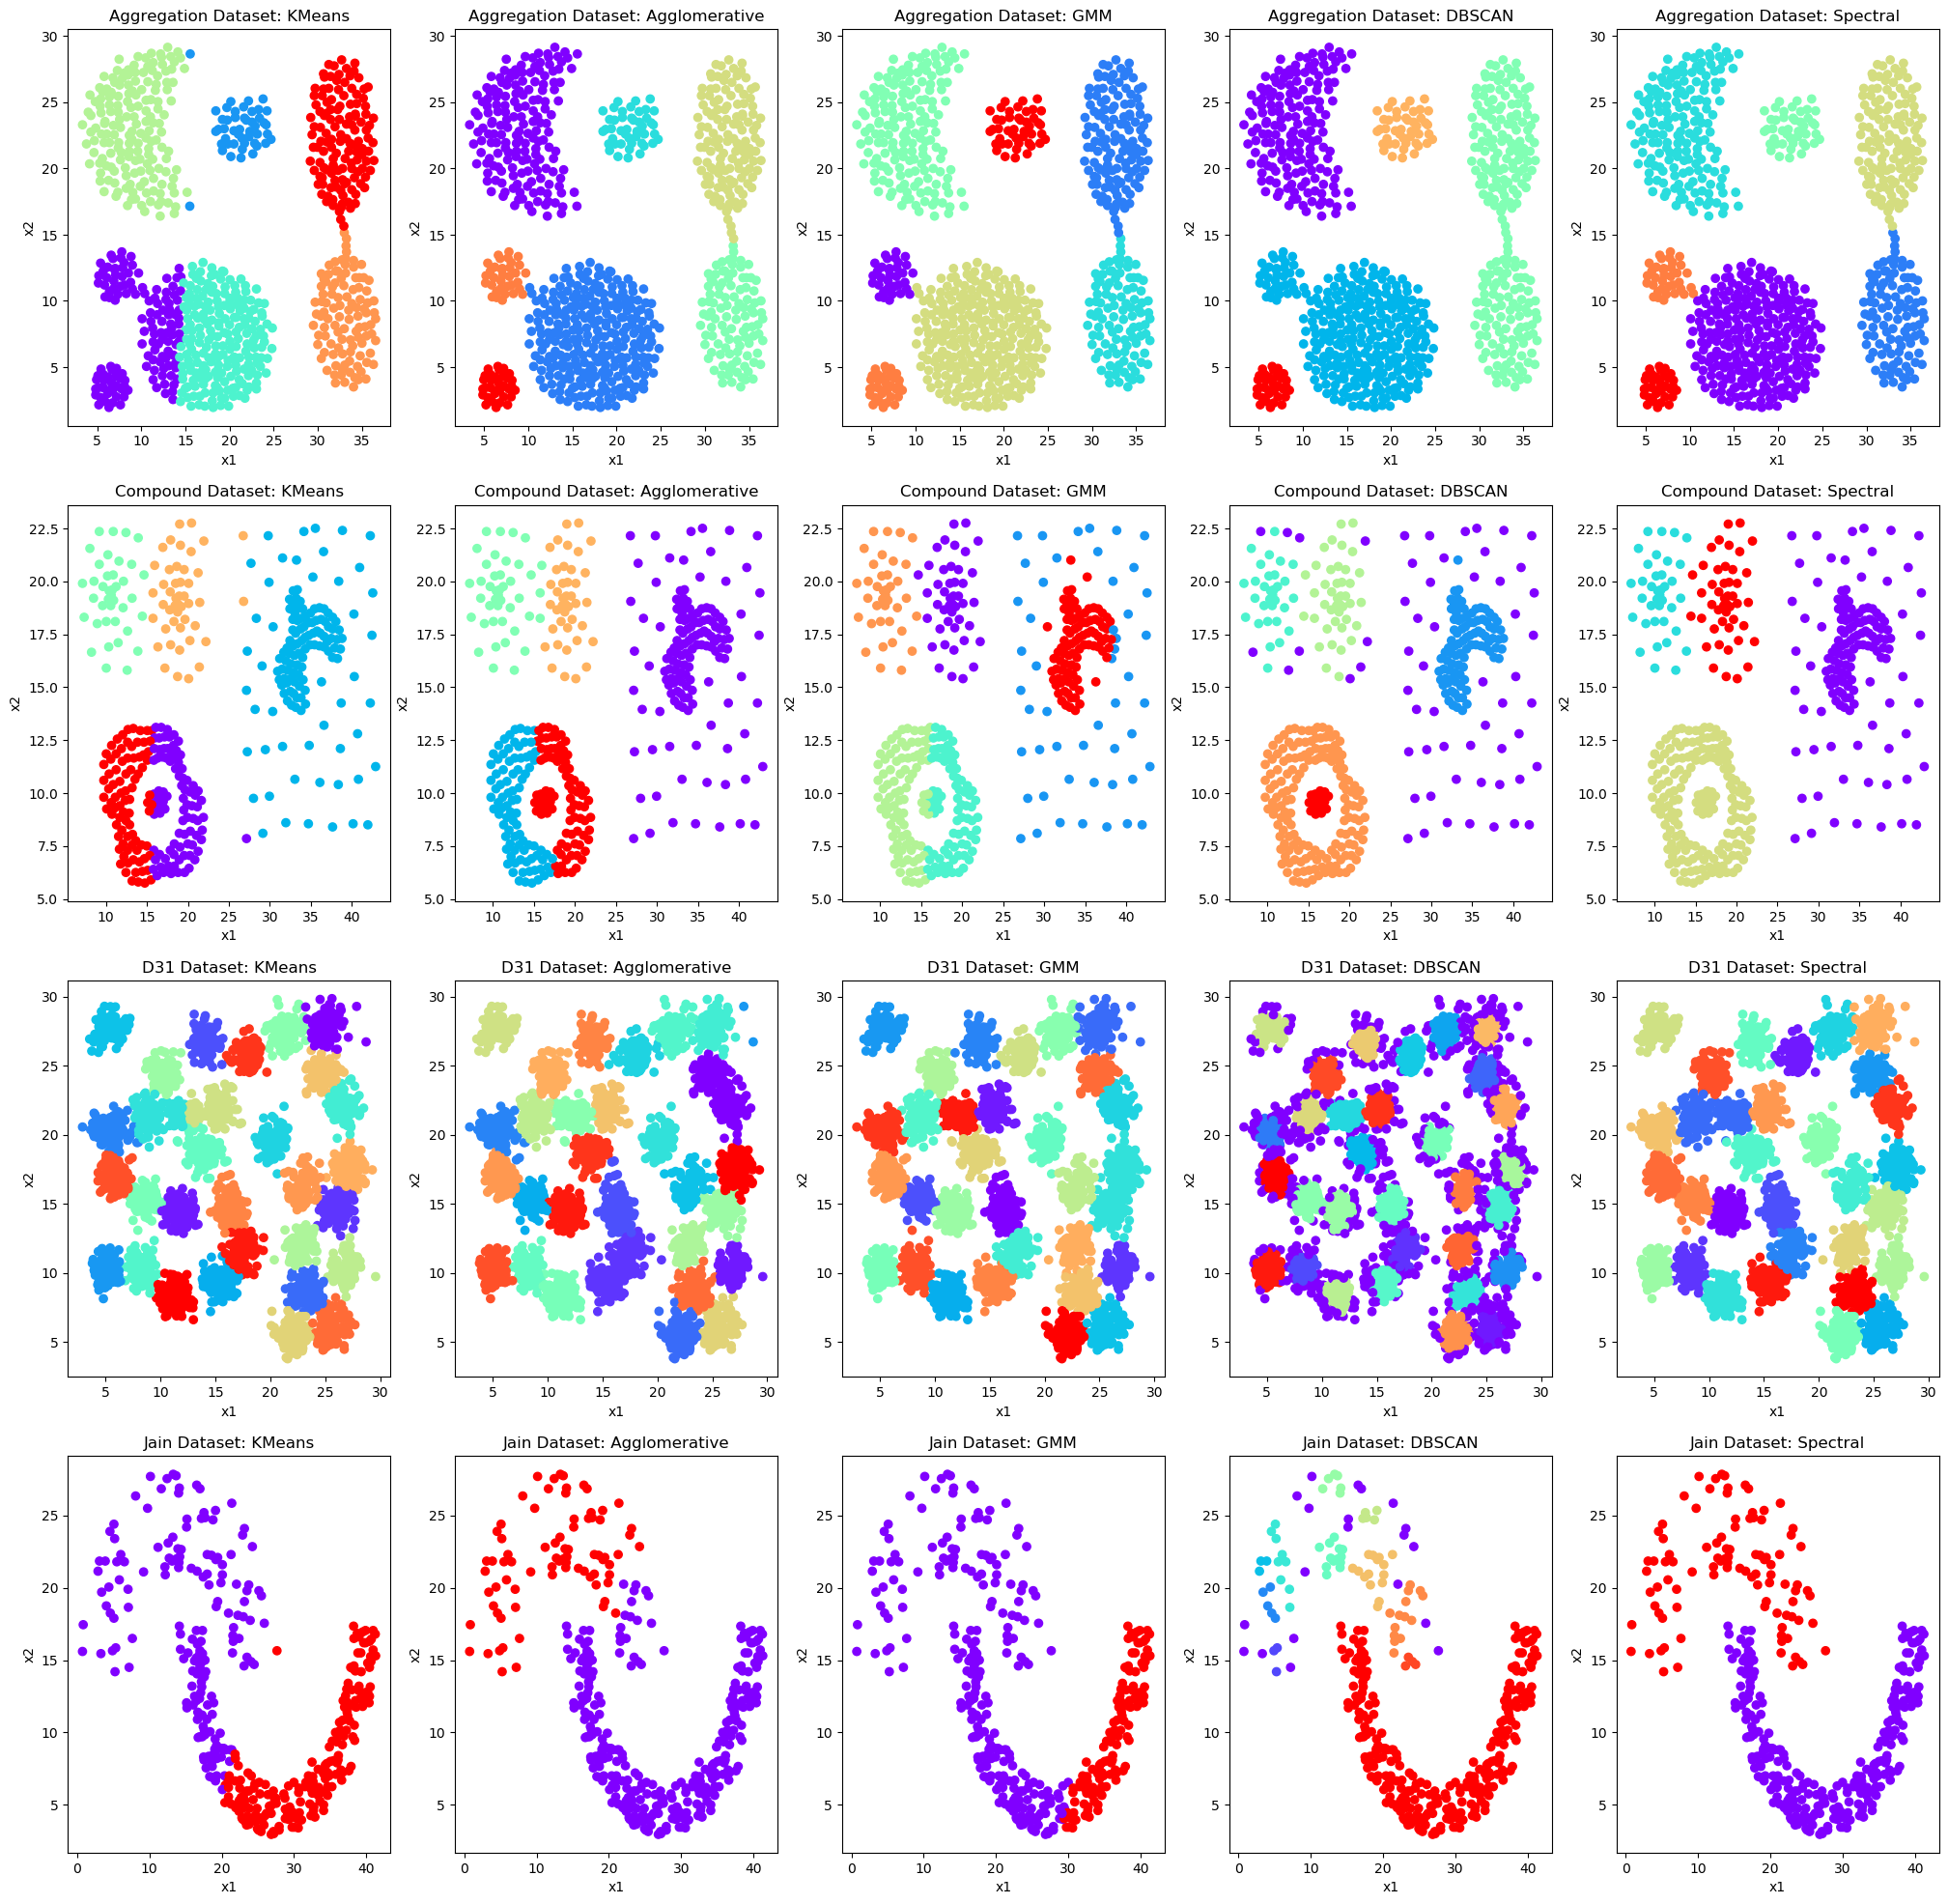

In [127]:
# Final plots
numRows = 4
numCols = 5
fig, ax = plt.subplots(numRows,numCols, figsize = (25,25), dpi = 100)
for i in range(numRows):
    for j in range(numCols):
        ax[i,j].scatter(data[i][:,0], data[i][:,1], c = labels[i][j], cmap = 'rainbow')
        ax[i,j].set_xlabel('x1')
        ax[i,j].set_ylabel('x2')
        ax[i,j].set_title(f'{data_names[i]} Dataset: {method_names[j]}')

Based on the results above, we can identify the best clustering methods for each dataset, described as follows:
1. Aggregation: The agglomerative and spectral clustering methods split the data cleanly into 7 distinct clusters, which makes sense since there is no noisy data and the clusters are well connected. K-means performs the worst due to the varying shapes of the clusters, leading to higher variances. 
2. Compound: The DBSCAN method works best since it is the only one that splits the bottom left clusters into 2 unique ones and cleanly separates the right cluster from the sparse points. DBSCAN works best for this dataset because it takes into account the number of points within a distance from a core point, enabling a density calculation that better separates the clusters. 
3. D31: K-means appears to best separate this data when given 30 centroids, and while agglomerative, GMM, and spectral clustering do cluster the data well, there are a few adjacent clusters with the same color, indicating slightly less accurate clustering compared to k-means. DBSCAN performs the worst since it cannot easily separate core and boundary points due to the proximity of the clusters. 
4. Jain: Spectral clustering works best for this dataset since it takes into account connectedness of the data and is the only one that separates the two half-moons cleanly. It is not depend on data distribution or variances, making it much more effective at clustering data that follows a pattern compared to the other methods. 

## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

**ANSWER**

**(a)** The digits dataset is loaded from scikit-learn and several example images are plotted.

In [2]:
# Import libraries
import numpy as np
from sklearn.datasets import load_digits 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load digits dataset
digits = load_digits()
images = digits.images

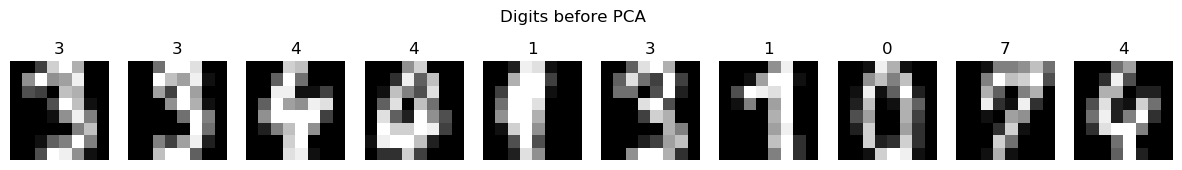

In [3]:
# Plot images without reduction
np.random.seed(123)
rand_index = np.random.choice(images.shape[0], 10, replace = False)

fig, ax = plt.subplots(1,10, figsize = (15,15), dpi = 100)
fig.suptitle('Digits before PCA')
fig.subplots_adjust(top = 1.7)
for i in range(10):
    ax[i].imshow(images[rand_index[i]], cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(digits.target[rand_index[i]])
plt.show()

Using PCA, the digits are reduced into 2-dimensions as follows:

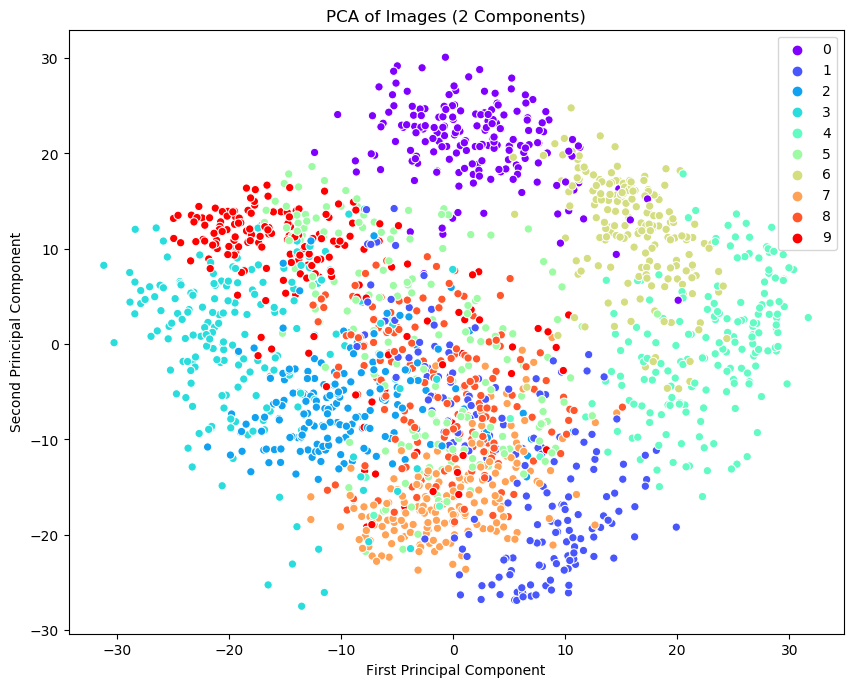

In [4]:
# Reduce to 2 dimensions using PCA
pca = PCA(n_components = 2)
digits_reduced = pca.fit_transform(digits.data)

# Plot data
plt.figure(figsize = (10,8), dpi = 100)
sns.scatterplot(digits_reduced[:,0], digits_reduced[:,1], 
                hue = digits.target, palette = 'rainbow',
                legend = 'full')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Images (2 Components)')
plt.show()

**(b)** The plot of variance explained for each number of components is shown below.

In [5]:
# Determine dimensionality of data
digits_data = digits.data
dimensions = digits_data.shape[1]

# Create vector of dimensions
D = np.arange(1,dimensions+1)

# Initialize array of unexplained variance ratios
unexplained_vars = np.zeros(len(D))

In [6]:
# Perform PCA for each value from 1 to D
for i in D:
    # Perform PCA
    pca = PCA(n_components = i)
    pca.fit_transform(digits.data)
    
    # Add unexplained variance
    unexplained_vars[i-1] = 1 - np.sum(pca.explained_variance_ratio_)
    pass

In [242]:
print(f'The fraction of variance in the data that is not explained by the first 2 principal components is '
      f'{unexplained_vars[1]:.3f}.')

The fraction of variance in the data that is not explained by the first 2 principal components is 0.715.


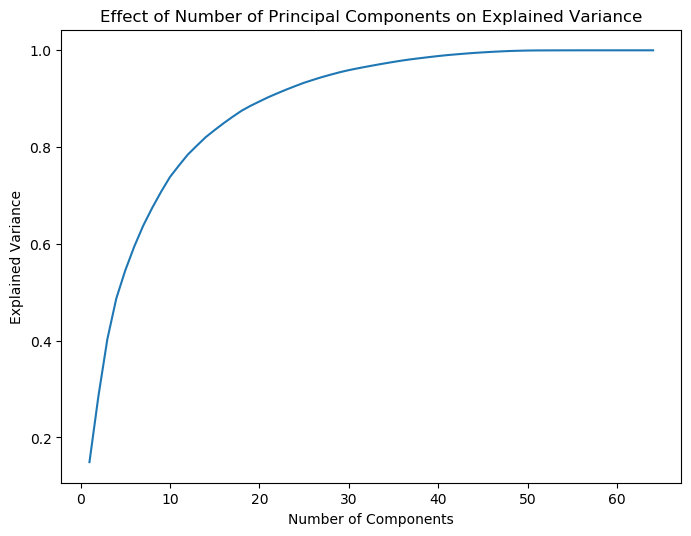

In [7]:
# Plot unexplained variance
plt.figure(figsize = (8,6), dpi = 100)
sns.lineplot(D, 1 - unexplained_vars)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Effect of Number of Principal Components on Explained Variance')
plt.show()

As seen in the graph above, the number of components plays a significant role in explaining variance. For images, reducing the dimensions to only 2 features using PCA causes many other features to be excluded. These features are important for classifying the image, and without them, the clustering algorithm has very poor performance, leaving 71.5% of the variation unexplained. 

**(c)** Reduction of the data using t-SNE is shown below.

In [244]:
# Reduce to 2 dimensions using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 40, random_state = 0)
digits_tsne = tsne.fit_transform(digits.data)

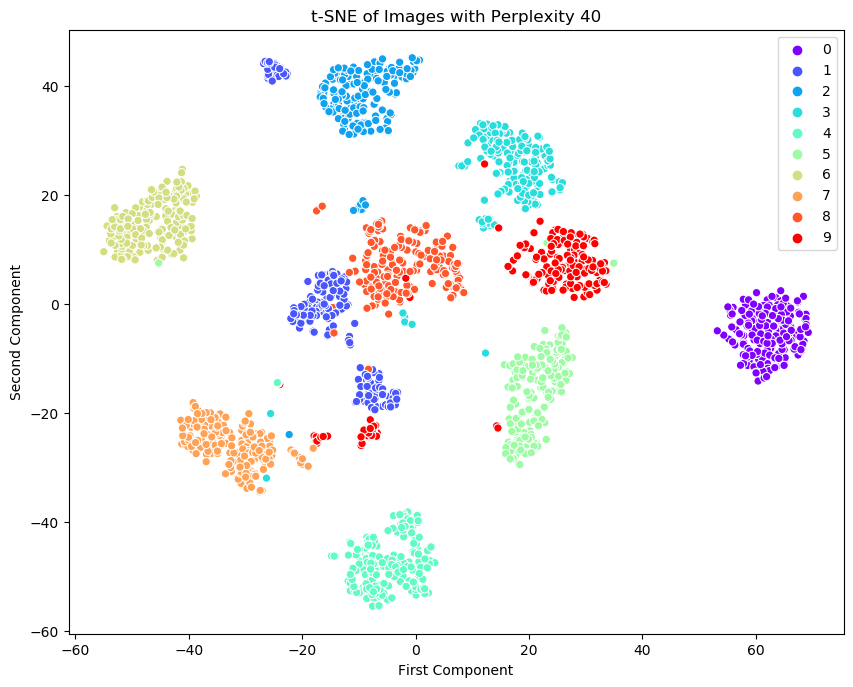

In [245]:
# Plot data
plt.figure(figsize = (10,8), dpi = 100)
sns.scatterplot(digits_tsne[:,0], digits_tsne[:,1], 
                hue = digits.target, palette = 'rainbow',
                legend = 'full')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title(f't-SNE of Images with Perplexity {tsne.perplexity}')
plt.show()

**(d)** Based on the above plots, using t-SNE is clearly better at clustering compared to PCA. We can see much more separation for each of the classes/labels when using t-SNE whereas with PCA, there is a lot of overlap. Using only 2 principal components leaves 71.5% of the variance unexplained, which is a large lack of information. PCA is quicker to run but is not appropriate for image data that contains many dimensions. t-SNE is much better suited at clustering images compared to PCA in the 2-dimensional space. 

## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

**(c)** Suggest two ways in which you neural network implementation could be improved.

**ANSWER**

**(a)** The neural network class is shown below. The class was created using Welch Lab's tutorials on neural networks, found [here](https://www.youtube.com/watch?v=bxe2T-V8XRs). 

In [20]:
import numpy as np

class myNeuralNetwork(object):
    def __init__(self, n_in, n_layer1, n_layer2, n_out, learning_rate=0.1):
        '''__init__
        Class constructor: Initialize the parameters of the network including
        the learning rate, layer sizes, and each of the parameters
        of the model (weights, placeholders for activations, inputs, 
        deltas for gradients, and weight gradients). This method
        should also initialize the weights of your model randomly
            Input:
                n_in:          number of inputs
                n_layer1:      number of nodes in layer 1
                n_layer2:      number of nodes in layer 2
                n_out:         number of output nodes
                learning_rate: learning rate for gradient descent
            Output:
                none
        '''
        # Initialize random seed
        np.random.seed(123)
        
        # Initialize inputted variables
        self.n_in = n_in
        self.n_layer1 = n_layer1
        self.n_layer2 = n_layer2
        self.n_out = n_out
        self.lr = learning_rate
        
        # Randomly initialize weights
        self.w1 = np.random.randn(self.n_in, self.n_layer1)
        self.w2 = np.random.randn(self.n_layer1, self.n_layer2)
        self.w3 = np.random.randn(self.n_layer2, self.n_out)
        
    def forward_propagation(self, x):
        '''forward_propagation
        Takes a vector of your input data (one sample) and feeds
        it forward through the neural network, calculating activations and
        layer node values along the way.
            Input:
                x: a vector of data represening 1 sample [n_in x 1]
            Output:
                y_hat: a vector (or scaler of predictions) [n_out x 1]
                (typically n_out will be 1 for binary classification)
        '''
        
        # Initialize list of weights
        self.weights = [self.w1, self.w2, self.w3]
        
        # Initialize activations and z values
        self.activations = [None]*3
        self.z = [x, None, None, None]
        
        # Loop through layers starting with z0 = x
        for i in np.arange(len(self.weights)):
            self.activations[i] = self.z[i]@self.weights[i]
            self.z[i+1] = self.sigmoid(self.activations[i])
            pass
        
        # Return final z value (y_hat)
        return self.z[-1]
        
    def compute_loss(self, X, y):
        '''compute_loss
        Computes the current loss/cost function of the neural network
        based on the weights and the data input into this function.
        To do so, it runs the X data through the network to generate
        predictions, then compares it to the target variable y using
        the cost/loss function
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                loss: a scalar measure of loss/cost
        '''
        # Create y_hat variable
        y_hat = self.forward_propagation(X)
        
        # Compute loss
        loss = (0.5*np.sum((y_hat-y)**2))/len(y)
        return loss
        
    def backpropagate(self, x, y):
        '''backpropagate
        Backpropagate the error from one sample determining the gradients
        with respect to each of the weights in the network. The steps for
        this algorithm are:
            1. Run a forward pass of the model to get the activations 
               Corresponding to x and get the loss function of the model 
               predictions compared to the target variable y
            2. Compute the deltas (see lecture notes) and values of the
               gradient with respect to each weight in each layer moving
               backwards through the network
    
            Input:
                x: A vector of 1 samples of data [n_in x 1]
                y: Target variable [scalar]
            Output:
                loss: a scalar measure of the loss/cost associated with x,y
                      and the current model weights
        '''
        # Compute y_hat from forward propagation
        y_hat = self.forward_propagation(x)
        
        # Compute derivative of loss function (dE/dyhat)
        error_deriv = y_hat - y
        
        # Compute deltas, initialize last delta as error_deriv*sigmoid_derivative(a3)
        self.deltas = [None, None, error_deriv*self.sigmoid_derivative(self.activations[-1])]
        
        # Initialize error with respect to weights (dE/dw)
        self.dedw = [None, None, self.z[2].T@self.deltas[2]]
                       
        # Run backward propagation   
        for i in reversed(np.arange(len(self.deltas)-1)):
            self.deltas[i] = (self.deltas[i+1]@self.weights[i+1].T)*self.sigmoid_derivative(self.activations[i])
            self.dedw[i] = self.z[i].T@self.deltas[i]

        # Run forward pass of model and calculate loss
        loss = self.compute_loss(x, y)
        return loss
        
    def stochastic_gradient_descent_step(self):
        '''stochastic_gradient_descent_step
        Using the gradient values computer by backpropagate, update each
        weight value of the model according to the familiar stochastic
        gradient descent update equation.
        
        Input: none
        Output: none
        '''
        # Loop through weights and update using gradient and learning rate
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr*self.dedw[i]
    
    def fit(self, X, y, max_epochs=100, get_validation_loss=True, val_rate = 0.2):
        '''fit
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                training_loss:   Vector of training loss values at the end of each epoch
                validation_loss: Vector of validation loss values at the end of each epoch
                                 [optional output if get_validation_loss==True]
        '''
        # Initialize train loss list
        train_loss = np.zeros(max_epochs)
        
        # Initialize validation loss list
        val_loss = None
        
        # Shuffle indices
        x_len = X.shape[0]
        ind = np.arange(x_len)
        np.random.shuffle(ind)
        
        # Create training dataset from shuffled data
        X_train = X[ind]
        y_train = y[ind]
        
        # Split into test and validation if validation set requested
        if get_validation_loss == True:
            X_train, X_val = X_train[0:int((1-val_rate)*x_len)], X_train[int((1-val_rate)*x_len):]
            y_train, y_val = y_train[0:int((1-val_rate)*x_len)], y_train[int((1-val_rate)*x_len):]
            
            # Initialize validation loss list
            val_loss = np.zeros(max_epochs)
            pass
        
         # Fit to the data with SGD
        for i in range(max_epochs):
            # Randomly sort training samples
            x_train_len = X_train.shape[0]
            x_train_ind = np.arange(x_train_len)
            np.random.shuffle(x_train_ind)
            X_train = X_train[x_train_ind]
            y_train = y_train[x_train_ind]
            
            # Backpropagate (batch?)
            # self.backpropagate(X_train, y_train)
            # self.stochastic_gradient_descent_step()
            
            # Backpropagate (stochastic)
            for j in range(X_train.shape[0]):
                self.backpropagate(X_train[j:j+1], y_train[j:j+1])
                self.stochastic_gradient_descent_step()
                
            # Update training epoch array
            train_loss[i] = self.compute_loss(X_train, y_train)
            if get_validation_loss == True:
                val_loss[i] = self.compute_loss(X_val, y_val)
            pass
        
        # Return datasets (for comparing decision boundaries) and loss values
        return X_train, y_train, X_val, y_val, train_loss, val_loss
                  
    def predict_proba(self, X):
        '''predict_proba
        Compute the output of the neural network for each sample in X, with the last layer's
        sigmoid activation providing an estimate of the target output between 0 and 1
            Input:
                X: A matrix of N samples of data [N x n_in]
            Output:
                y_hat: A vector of class predictions between 0 and 1 [N x 1]
        '''
        # Return predicted probabilities
        y_hat = self.forward_propagation(X)
        return y_hat
    
    def predict(self, X, decision_thresh= 0.5):
        '''predict
        Compute the output of the neural network prediction for 
        each sample in X, with the last layer's sigmoid activation 
        providing an estimate of the target output between 0 and 1, 
        then thresholding that prediction based on decision_thresh
        to produce a binary class prediction
            Input:
                X: A matrix of N samples of data [N x n_in]
                decision_threshold: threshold for the class confidence score
                                    of predict_proba for binarizing the output
            Output:
                y_hat: A vector of class predictions of either 0 or 1 [N x 1]
        '''
        # Return class predictions
        y_hat = (self.forward_propagation(X) > decision_thresh).astype(int)
        return y_hat
    
    def sigmoid(self, X):
        '''sigmoid
        Compute the sigmoid function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid function
        '''
        return 1/(1+np.exp(-X)) 
        
    def sigmoid_derivative(self, X):
        '''sigmoid_derivative
        Compute the sigmoid derivative function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid derivative function
        '''
        return self.sigmoid(X)*(1-self.sigmoid(X))

**(b)** To test the neural network, we will evaluate it on a generated dataset from the make_moons module in sklearn. Results are shown below.

In [21]:
# Create make moons datasets
from sklearn.datasets import make_moons
x_train, y_train = make_moons(n_samples = 500, noise = 0.20, random_state = 0)
y_train = y_train.reshape(-1,1)
x_test, y_test = make_moons(n_samples = 100, noise = 0.20, random_state = 0)
y_test = y_test.reshape(-1,1)

In [22]:
# Create neural network
nn = myNeuralNetwork(n_in = 2, n_layer1 = 5, n_layer2 = 5, n_out = 1, learning_rate = 0.01)

# Train 
xt, yt, x_val, y_val, x_train_loss, x_val_loss = nn.fit(x_train, y_train, max_epochs = 5000, get_validation_loss = True, val_rate = 0.2)

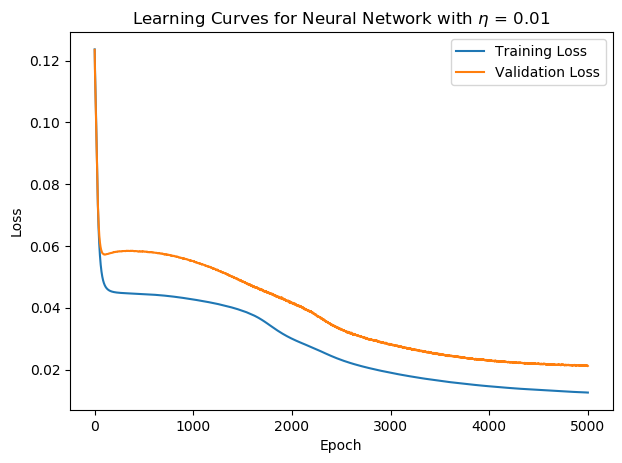

In [23]:
# Plot curves
import matplotlib.pyplot as plt
plt.figure(figsize = (7,5), dpi = 100)
epochs = np.arange(len(x_train_loss))
plt.plot(epochs, x_train_loss, label = 'Training Loss')
plt.plot(epochs, x_val_loss, label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves for Neural Network with $\eta$ = 0.01')
plt.legend(loc = 'upper right')
plt.show()

From the plot above, running approximately 5000 epochs enables convergence. The loss on the validation data is also not too much different from that of the training data, suggesting good generalizability. 

Decision boundaries of the neural network on train and validation data are shown below. The boundary is calculated using just the training data. It shows very strong separation of the two classes in the dataset for both training and validation data. 

In [11]:
# Plot data
# Create meshgrid
nvalues = 500
x1_vals = np.linspace(xt[:,0].min() - 1, xt[:,0].max() + 1, nvalues)
x2_vals = np.linspace(xt[:,1].min() - 1, xt[:,1].max() + 1, nvalues)
xx1, xx2 = np.meshgrid(x1_vals, x2_vals)
xvals = np.concatenate((np.c_[xx1.ravel()],np.c_[xx2.ravel()]),axis = 1)

# Create boundary based on training data
bound_prob = nn.predict_proba(xvals).reshape(xx1.shape)

In [12]:
# Import colors
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
cmap_back = ListedColormap(['lightcoral','lightskyblue'])
cmap_front = ListedColormap(['red','blue'])

# Set color labels
blue = mpatches.Patch(color='blue', label= '1')
red = mpatches.Patch(color='red', label= '0')

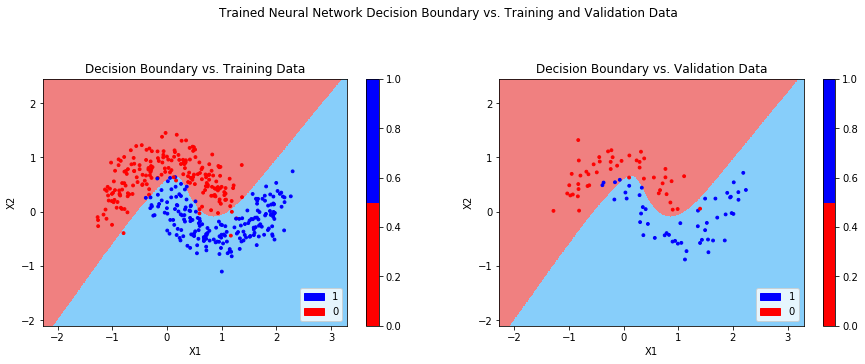

In [13]:
# Create figure
plt.figure(figsize = (15, 10))
plt.suptitle('Trained Neural Network Decision Boundary vs. Training and Validation Data')

# Training data
plt.subplot(2,2,1)
plt.pcolormesh(xx1,xx2,bound_prob,cmap = cmap_back)
plt.scatter(xt[:,0],xt[:,1], c = yt.ravel(), cmap = cmap_front, s = 8)
plt.legend(handles = [blue, red], loc = 'lower right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary vs. Training Data')
plt.colorbar()

# Test data
plt.subplot(2,2,2)
plt.pcolormesh(xx1,xx2,bound_prob,cmap = cmap_back)
plt.scatter(x_val[:,0],x_val[:,1], c = y_val.ravel(), cmap = cmap_front, s = 8)
plt.legend(handles = [blue, red], loc = 'lower right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary vs. Validation Data')
plt.colorbar()
plt.show()

The test data performance of the model is also compared against that of the MLPClassifier in sklearn. The MLPClassifier is trained on the same training data as the myNeuralNetwork model and has the same parameters. The ROC curves for both models are shown below. 

In [17]:
# Train on same data using MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (5,5), activation = 'logistic', solver = 'sgd',
                  batch_size = 1, learning_rate_init = 0.01, max_iter = 5000, random_state = 15)

mlp.fit(xt, yt.ravel())
mlp_preds = mlp.predict_proba(x_test)[:,1]

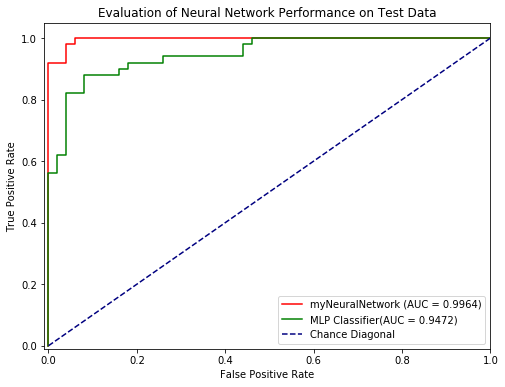

In [18]:
# Compare with MLP Classifier using AUC
from sklearn import metrics

# ROC metrics
fpr,tpr,threshold = metrics.roc_curve(y_test, nn_pred_probs, pos_label = 1) # myNN
fpr_sk, tpr_sk, threshold_skr = metrics.roc_curve(y_test, mlp_preds, pos_label = 1) # MLP

# Plot ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'red', label = f'myNeuralNetwork (AUC = {round(metrics.auc(fpr,tpr),4)})')
plt.plot(fpr_sk, tpr_sk, color = 'green', label = f'MLP Classifier(AUC = {round(metrics.auc(fpr_sk,tpr_sk),4)})')
plt.plot([0,1],[0,1],color = 'navy', linestyle = '--', label = 'Chance Diagonal')
plt.xlim(-0.01,1)
plt.ylim(-0.01,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Evaluation of Neural Network Performance on Test Data')
plt.legend(loc = 'lower right')
plt.show()

Based on the above model, the myNeuralNetwork shows stronger performance on the test data compared to that of the MLPClassifier, though the latter's performance does vary depending on the initial random seed. Both are much stronger than random chance, and the myNeuralNetwork shows extremely high performance, suggesting strong generalizability on new datasets.

**(c)** Two ways to improve the neural network include the following:
1. Regularization: Regularization methods such as L2 and L1 regularization can help reduce the number of parameters in the model, thereby improving speed. In addition, a method such as dropout can better utilize more active neurons and set inactive ones to zero, again reducing computational time. 

2. Hyperparameter adjustment: Additional adjustment such as tweaking the number of nodes per layer and the number of hidden layers can improve performance and speed. In addition, a constant bias term could be added in each layer to better fit the data and enable more accurate predictions. 